In [117]:
import numpy as np
import pandas as pd
from sklearn import metrics
from sklearn.linear_model import LinearRegression
from sklearn.metrics import r2_score
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt
from sklearn.preprocessing import PolynomialFeatures, LabelEncoder

df = pd.read_csv('../data/RFID_DATA_SET_v1.csv')
df.fillna(0)
print(df)

# normalize data
ID = df['ID'].values
le = LabelEncoder()
id_encoded = le.fit_transform(np.ravel(ID))    # warn
df['ID'] = id_encoded
print(df)

      DISTANCE  DETECT  RSSI_DEC  FREQUENCY                        ID  CYCLE  \
0           10       1       234   10761485  e20051397201021118904d81      1   
1           20       1       214   16529165  e20051397201021118904d81      1   
2           30       1       178   11287565  e20051397201021118904d81      1   
3           40       1       146    5519885  e20051397201021118904d81      1   
4           50       1       128   10761485  e20051397201021118904d81      1   
...        ...     ...       ...        ...                       ...    ...   
1995       160       0         0          0  e20051397201021218904d7d      5   
1996       170       0         0          0  e20051397201021218904d7d      5   
1997       180       0         0          0  e20051397201021218904d7d      5   
1998       190       0         0          0  e20051397201021218904d7d      5   
1999       200       0         0          0  e20051397201021218904d7d      5   

       N  READ_RATE  
0      1        1

In [118]:
dataset = df

X = dataset['DISTANCE'].to_frame()
y = dataset['READ_RATE'].values

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=0)
poly = PolynomialFeatures(degree=6)
x_poly = poly.fit_transform(X_train)
poly.fit(X_train, y_train)

lin = LinearRegression()
lin.fit(x_poly, y_train)

LinearRegression()

In [119]:
y_pred = lin.predict(poly.fit_transform(X_test))
r2 = r2_score(y_test, y_pred)
print(r2)

0.729368750873685


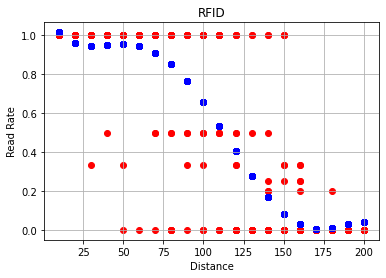

In [120]:
plt.title("RFID")
plt.xlabel("Distance")
plt.ylabel("Read Rate")

plt.scatter(X_test, y_test, color='red')
plt.scatter(X_test, y_pred, color='blue')
plt.grid()
plt.show()

[234 214 178 ...   0   0   0]
0.8410446679372838


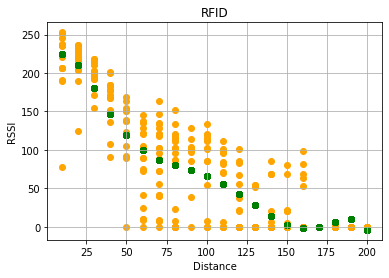

In [121]:
X2 = dataset['DISTANCE'].to_frame()
y2 = dataset['RSSI_DEC'].values
print(y2)
X_train2, X_test2, y_train2, y_test2 = train_test_split(X2, y2, test_size=0.2, random_state=0)
poly2 = PolynomialFeatures(degree=6)
x_poly2 = poly2.fit_transform(X_train2)
poly2.fit(X_train2, y_train2)

lin2 = LinearRegression()
lin2.fit(x_poly2, y_train2)
y_pred2 = lin2.predict(poly2.fit_transform(X_test2))
r22 = r2_score(y_test2, y_pred2)
print(r22)
plt.title("RFID")
plt.xlabel("Distance")
plt.ylabel("RSSI")

plt.scatter(X_test2, y_test2, color='orange')
plt.scatter(X_test2, y_pred2, color='green')
plt.grid()
plt.show()